# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#cities = {"mazagao"}

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "https://api.openweathermap.org/data/2.5/weather?q="+city+"&appid="+weather_api_key+"&units=metric"
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get (city_url)
        city_weather = response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
# import json
# print(json.dumps(city_weather, indent=4, sort_keys=True))
# print (city_lat, city_lng, city_max_temp, city_humidity, city_clouds, city_wind, city_country, city_date)
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | portland
Processing Record 2 of Set 1 | usinsk
Processing Record 3 of Set 1 | liwale
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | aasiaat
Processing Record 6 of Set 1 | wamba
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | kyaikkami
Processing Record 9 of Set 1 | chonchi
Processing Record 10 of Set 1 | bedum
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | rudbar
Processing Record 14 of Set 1 | bamyan
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | mundybash
Processing Record 17 of Set 1 | changwon
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | cargados carajos
City not foun

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame (city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,portland,45.5234,-122.6762,17.97,56,100,4.47,US,1712115758
1,usinsk,65.9939,57.5281,-18.78,88,9,2.56,RU,1712116270
2,liwale,-9.7667,37.9333,20.66,98,82,1.37,TZ,1712116271
3,blackmans bay,-43.0167,147.3167,14.85,53,100,1.34,AU,1712116272
4,aasiaat,68.7098,-52.8699,-11.37,88,98,2.31,GL,1712116273


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,portland,45.5234,-122.6762,17.97,56,100,4.47,US,1712115758
1,usinsk,65.9939,57.5281,-18.78,88,9,2.56,RU,1712116270
2,liwale,-9.7667,37.9333,20.66,98,82,1.37,TZ,1712116271
3,blackmans bay,-43.0167,147.3167,14.85,53,100,1.34,AU,1712116272
4,aasiaat,68.7098,-52.8699,-11.37,88,98,2.31,GL,1712116273


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

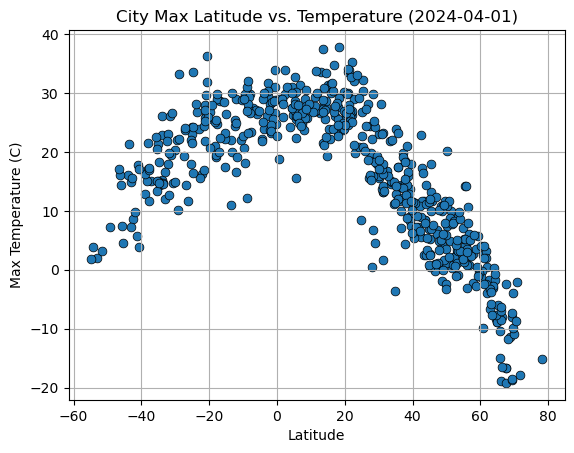

In [8]:
# Build scatter plot for latitude vs. temperature
lat_vs_temp_scatterplot = city_data_df.plot.scatter (x = 'Lat', y = 'Max Temp', s = 40, edgecolors = 'black', linewidth = 0.5) 

# Incorporate the other graph properties
lat_vs_temp_scatterplot.set_title ("City Max Latitude vs. Temperature (2024-04-01)")
lat_vs_temp_scatterplot.set_xlabel ("Latitude")
lat_vs_temp_scatterplot.set_ylabel ("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

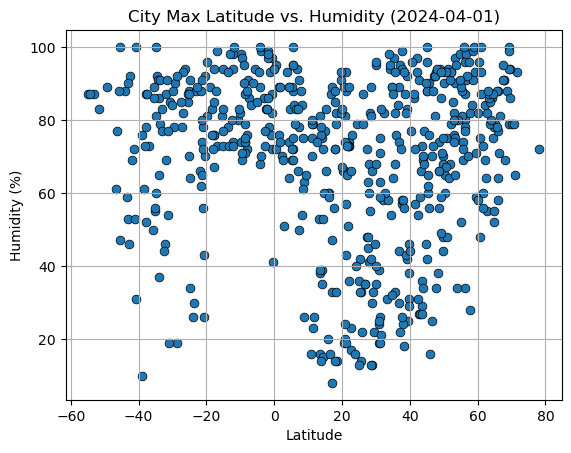

In [9]:
# Build the scatter plots for latitude vs. humidity
lat_vs_humidity_scatterplot = city_data_df.plot.scatter (x = 'Lat', y = 'Humidity', s = 40, edgecolors = 'black', linewidth = 0.5) 

# Incorporate the other graph properties
lat_vs_humidity_scatterplot.set_title ("City Max Latitude vs. Humidity (2024-04-01)")
lat_vs_humidity_scatterplot.set_xlabel ("Latitude")
lat_vs_humidity_scatterplot.set_ylabel ("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

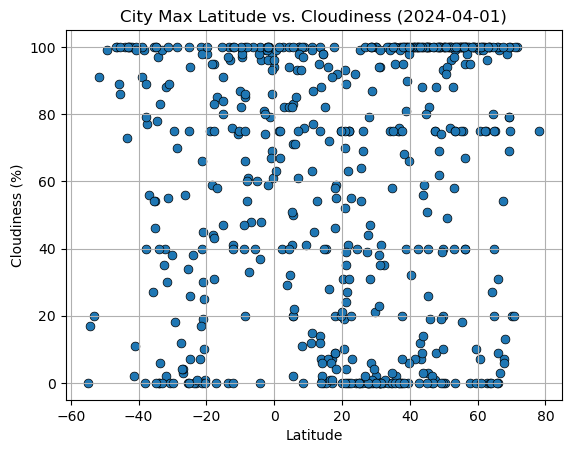

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat_vs_cloudiness_scatterplot = city_data_df.plot.scatter (x = 'Lat', y = 'Cloudiness', s = 40, edgecolors = 'black', linewidth = 0.5) 

# Incorporate the other graph properties
lat_vs_cloudiness_scatterplot.set_title ("City Max Latitude vs. Cloudiness (2024-04-01)")
lat_vs_cloudiness_scatterplot.set_xlabel ("Latitude")
lat_vs_cloudiness_scatterplot.set_ylabel ("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

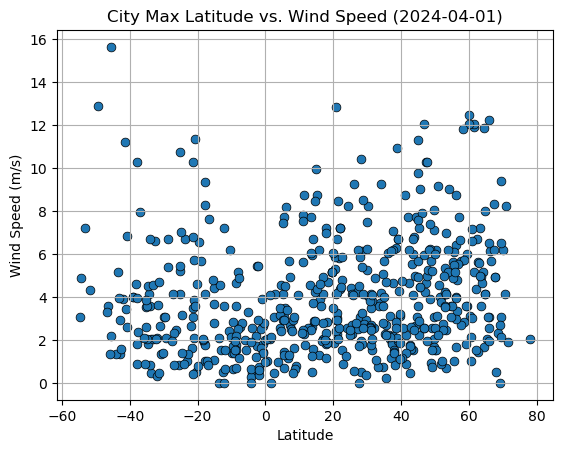

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat_vs_windspeed_scatterplot = city_data_df.plot.scatter (x = 'Lat', y = 'Wind Speed', s = 40, edgecolors = 'black', linewidth = 0.5) 

# Incorporate the other graph properties
lat_vs_windspeed_scatterplot.set_title ("City Max Latitude vs. Wind Speed (2024-04-01)")
lat_vs_windspeed_scatterplot.set_xlabel ("Latitude")
lat_vs_windspeed_scatterplot.set_ylabel ("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regr_plot (xSeries, xLabel, ySeries, yLabel, text_xPos, text_yPos):
    
    import scipy.stats as st
    from scipy.stats import linregress
    
    correlation = st.pearsonr (xSeries, ySeries)
    (slope, intercept, rvalue, pvalue, stderr) = linregress (xSeries, ySeries)
    regress_values = xSeries * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print (f"The r-value is: {rvalue}")
    
    plt.scatter (xSeries, ySeries)
    plt.plot(xSeries,regress_values,"r-")
    plt.xlabel (xLabel)
    plt.ylabel (yLabel)
    plt.text (text_xPos, text_yPos, line_eq, fontsize = 15, color = "red")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,portland,45.5234,-122.6762,17.97,56,100,4.47,US,1712115758
1,usinsk,65.9939,57.5281,-18.78,88,9,2.56,RU,1712116270
4,aasiaat,68.7098,-52.8699,-11.37,88,98,2.31,GL,1712116273
5,wamba,8.9333,8.6000,25.67,63,76,0.80,NG,1712116274
7,kyaikkami,16.0800,97.5675,29.93,60,72,3.92,MM,1712116277


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,liwale,-9.7667,37.9333,20.66,98,82,1.37,TZ,1712116271
3,blackmans bay,-43.0167,147.3167,14.85,53,100,1.34,AU,1712116272
6,waitangi,-43.9535,-176.5597,16.01,88,100,1.34,NZ,1712116276
8,chonchi,-42.6128,-73.8092,8.56,92,100,1.57,CL,1712116278
10,port-aux-francais,-49.3500,70.2167,7.29,89,99,12.90,TF,1712116281


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.9030000576933517


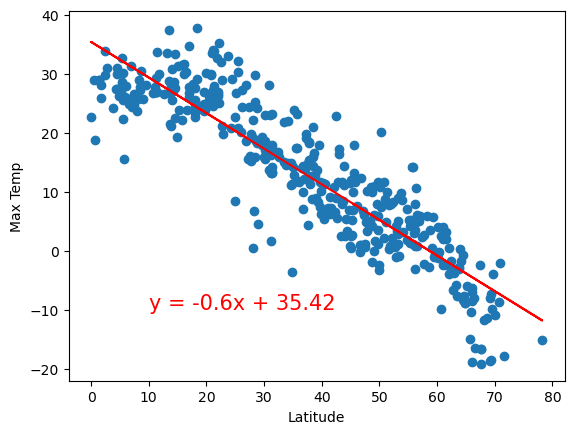

In [15]:
# Linear regression on Northern Hemisphere
linear_regr_plot (northern_hemi_df['Lat'], "Latitude", northern_hemi_df['Max Temp'], "Max Temp", 10, -10)

The r-value is: 0.7232712965307667


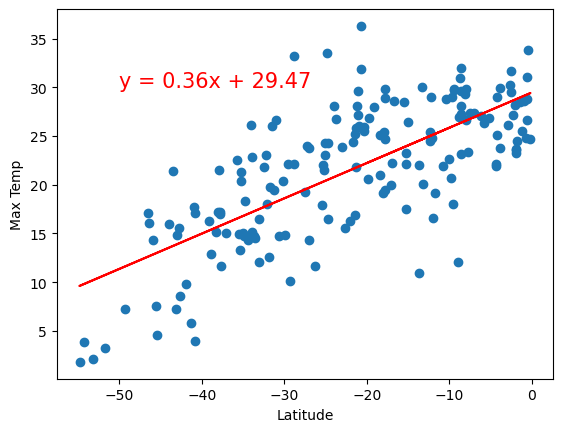

In [16]:
# Linear regression on Southern Hemisphere
linear_regr_plot (southern_hemi_df['Lat'], "Latitude", southern_hemi_df['Max Temp'], "Max Temp", -50, 30)

**Discussion about the linear relationship:** Regression plot indicates there is a strong correlation between Max Temp and Latitude. 
In the Northern hemisphere, Negative relationship exists between Max Temp and Latitude. Max Temp decreases (or Colder) as latitude increases when we move away from equator.
In the Southern Hemisphere, Positive relationship exists between Max Temp and Latitude. Max Temp increases (or hotter) as latitude increases when we move closer to equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2191300997592025


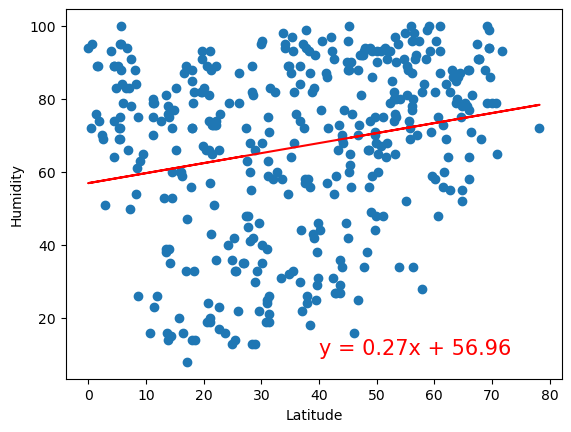

In [17]:
# Northern Hemisphere
linear_regr_plot (northern_hemi_df['Lat'], "Latitude", northern_hemi_df['Humidity'], "Humidity", 40, 10)

The r-value is: 0.24194025838675456


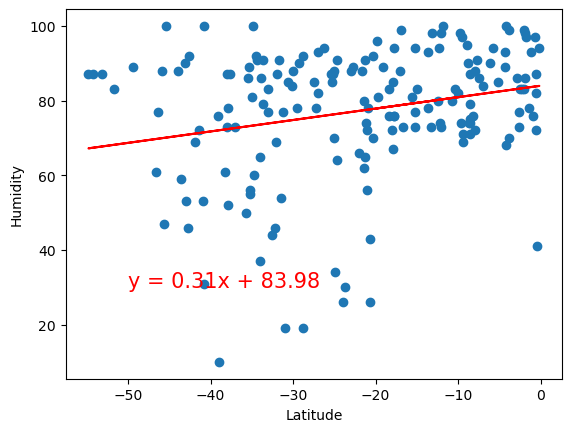

In [18]:
# Southern Hemisphere
linear_regr_plot (southern_hemi_df['Lat'], "Latitude", southern_hemi_df['Humidity'], "Humidity", -50, 30)

**Discussion about the linear relationship:** Regression plot indicates a mild positive relationship between Latitude and Humidity. 
In the Northern hemisphere, Humidity increases as latitude increases when we move away from equator.
In the Southern Hemisphere, Humidity increases as latitude increases when we move closer to equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17334002577251975


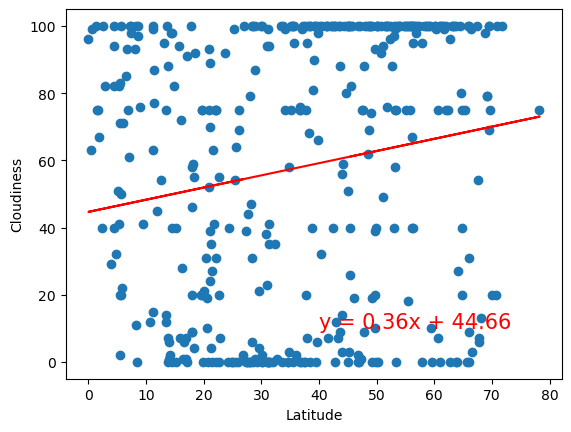

In [19]:
# Northern Hemisphere
linear_regr_plot (northern_hemi_df['Lat'], "Latitude", northern_hemi_df['Cloudiness'], "Cloudiness", 40, 10)

The r-value is: 0.13656747664178043


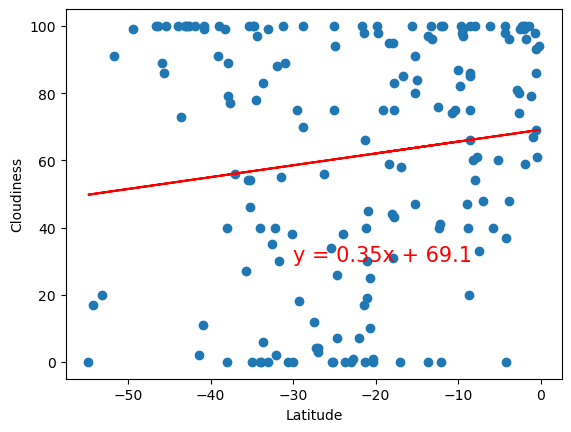

In [20]:
# Southern Hemisphere
linear_regr_plot (southern_hemi_df['Lat'], "Latitude", southern_hemi_df['Cloudiness'], "Cloudiness", -30, 30)

**Discussion about the linear relationship:** Regression plot indicates a mild positive relationship between Latitude and Cloudiness. 
In the Northern hemisphere, Cloudiness increases as latitude increases when we move away from equator.
In the Southern Hemisphere, Cloudiness increases as latitude increases when we move closer to equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1908894037364546


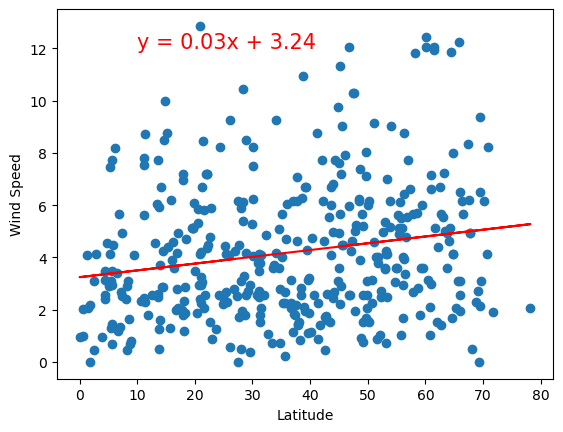

In [23]:
# Northern Hemisphere
linear_regr_plot (northern_hemi_df['Lat'], "Latitude", northern_hemi_df['Wind Speed'], "Wind Speed", 10, 12)

The r-value is: -0.29583189531154847


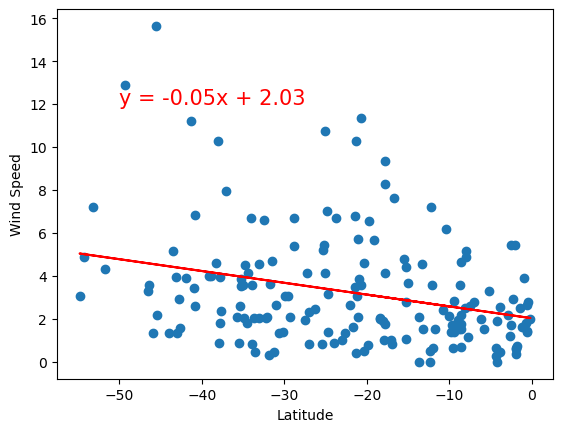

In [24]:
# Southern Hemisphere
linear_regr_plot (southern_hemi_df['Lat'], "Latitude", southern_hemi_df['Wind Speed'], "Wind Speed", -50, 12)

**Discussion about the linear relationship:** Regression plot indicates very minimal correlation between Wind speed and Latitude.